Capstone

# Import Data

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('data/WBDevelopmentIndicators.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


# Data Engineering

## Melt Years Wide to Long Format

In [3]:
#melt dataframe so that Year is it's own column
df_long = pd.melt(df, id_vars=df.columns[:4], var_name="Year")
df_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


In [4]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24906024 entries, 0 to 24906023
Data columns (total 6 columns):
Country Name      object
Country Code      object
Indicator Name    object
Indicator Code    object
Year              object
value             float64
dtypes: float64(1), object(5)
memory usage: 1.1+ GB


In [5]:
df_long.isna().sum()

Country Name             0
Country Code             0
Indicator Name           0
Indicator Code           0
Year                     0
value             16642966
dtype: int64

## Pivot Data to Make Indicators Columns

In [6]:
df_long.tail(100)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
24905924,Zimbabwe,ZWE,Total fisheries production (metric tons),ER.FSH.PROD.MT,2018,NaN
24905925,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,2018,NaN
24905926,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2018,NaN
24905927,Zimbabwe,ZWE,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,2018,NaN
24905928,Zimbabwe,ZWE,Total reserves (% of total external debt),FI.RES.TOTL.DT.ZS,2018,NaN
24905929,Zimbabwe,ZWE,"Total reserves (includes gold, current US$)",FI.RES.TOTL.CD,2018,NaN
24905930,Zimbabwe,ZWE,Total reserves in months of imports,FI.RES.TOTL.MO,2018,NaN
24905931,Zimbabwe,ZWE,Total reserves minus gold (current US$),FI.RES.XGLD.CD,2018,NaN
24905932,Zimbabwe,ZWE,Total tax and contribution rate (% of profit),IC.TAX.TOTL.CP.ZS,2018,31.600000
24905933,Zimbabwe,ZWE,Trade (% of GDP),NE.TRD.GNFS.ZS,2018,NaN


In [13]:
pivottest = df_long.tail(100)

In [14]:
pivoted = pd.pivot_table(pivottest, values = 'value', index=['Country Name', 'Country Code', 'Year'], columns=['Indicator Name'])
pivoted.head(100)

,,Indicator Name,Total tax and contribution rate (% of profit),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
Country Name,Country Code,Year,,,,,,,,,,,,,
Zimbabwe,ZWE,2018,31.6,5.428,4.42,4.915,9.083,7.362,8.161,75.554002,56.183999,65.651999,24.141001,43.176998,33.872002


In [15]:
df_pivot = pd.pivot_table(df_long, values = 'value', index=['Country Name', 'Country Code', 'Year'], columns=['Indicator Code'])

## Build DF with Melted and Pivoted Data

In [16]:
features = df_pivot.iloc[:,0:2]
features.head()

Indicator Code                  AG.AGR.TRAC.NO  AG.CON.FERT.PT.ZS
Country Name Country Code Year                                   
Afghanistan  AFG          1960             NaN                NaN
                          1961           120.0                NaN
                          1962           150.0                NaN
                          1963           200.0                NaN
                          1964           200.0                NaN

In [17]:
features = pd.concat([df_pivot['EN.POP.DNST'], df_pivot['SP.DYN.IMRT.IN'], 
                      df_pivot['SH.DYN.MORT'], df_pivot['SP.DYN.LE00.IN'], df_pivot['NY.GDP.PCAP.KD'], 
                      df_pivot['SL.TLF.TOTL.FE.ZS'], df_pivot['SG.DMK.ALLD.FN.ZS'], df_pivot['SE.PRM.CUAT.FE.ZS'],
                     df_pivot['SE.XPD.PRIM.PC.ZS'], df_pivot['SH.MMR.RISK.ZS']], axis=1)
#population density, 
#infant mortality, 
#under 5 mortality, 
#life expectancy at birth (years), 
#GDP per capita, 
#% female laborers of total labor force, 
#women participating in three decisions (own health care, major household purchases, visiting family),
#Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)
#gov expenditure on primary edu per student (% of GDP per capita), 
#lifetime risk of maternal mortality
features.head()

EN.POP.DNST  SP.DYN.IMRT.IN  SH.DYN.MORT  \
Country Name Country Code Year                                             
Afghanistan  AFG          1960          NaN           240.5        356.5   
                          1961    14.040934           236.2        350.5   
                          1962    14.315271           232.2        344.8   
                          1963    14.603367           228.3        339.3   
                          1964    14.905739           224.6        334.1   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.KD  \
Country Name Country Code Year                                   
Afghanistan  AFG          1960          32.292             NaN   
                          1961          32.742             NaN   
                          1962          33.185             NaN   
                          1963          33.624             NaN   
                          1964          34.060             NaN   

                                SL.TLF.TOTL.FE.ZS  SG.DMK.ALLD.FN.ZS  \
Country Name Country Code Year                                         
Afghanistan  AFG          1960                NaN                NaN   
                          1961                NaN                NaN   
                          1962                NaN                NaN   
                          1963                NaN                NaN   
                          1964                NaN                NaN   

                                SE.PRM.CUAT.FE.ZS  SE.XPD.PRIM.PC.ZS  \
Country Name Country Code Year                                         
Afghanistan  AFG          1960                NaN                NaN   
                          1961                NaN                NaN   
                          1962                NaN                NaN   
                          1963                NaN                NaN   
                          1964                NaN                NaN   

                                SH.MMR.RISK.ZS  
Country Name Country Code Year                  
Afghanistan  AFG          1960             NaN  
                          1961             NaN  
                          1962             NaN  
                          1963             NaN  
                          1964             NaN

# EDA

## Descriptive Statistics

What is the range of years?

In [18]:

print(min(df_long["Year"])," to ",max(df_long["Year"]))

1960  to  2018


How many unique countries and groups of countries are there?

In [19]:
df_long["Indicator Code"].nunique()

1599

## Missing values

### All years of data

In [20]:
# inspecting null values
NaN_features = features.isnull().sum().sort_values(ascending=False)
NaN_features

SG.DMK.ALLD.FN.ZS    15377
SE.PRM.CUAT.FE.ZS    14680
SE.XPD.PRIM.PC.ZS    13692
SH.MMR.RISK.ZS        9563
SL.TLF.TOTL.FE.ZS     8770
SH.DYN.MORT           4311
SP.DYN.IMRT.IN        4311
NY.GDP.PCAP.KD        4159
SP.DYN.LE00.IN        1520
EN.POP.DNST            885
dtype: int64

In [21]:
# calculate percentage of null values in each column
print(features['SG.DMK.ALLD.FN.ZS'].isna().sum() / features.shape[0])
print(features['SE.PRM.CUAT.FE.ZS'].isna().sum() / features.shape[0])
print(features['SE.XPD.PRIM.PC.ZS'].isna().sum() / features.shape[0])
print(features['SH.MMR.RISK.ZS'].isna().sum() / features.shape[0])
print(features['SL.TLF.TOTL.FE.ZS'].isna().sum() / features.shape[0])
print(features['SH.DYN.MORT'].isna().sum() / features.shape[0])
print(features['SP.DYN.IMRT.IN'].isna().sum() / features.shape[0])
print(features['NY.GDP.PCAP.KD'].isna().sum() / features.shape[0])
print(features['SP.DYN.LE00.IN'].isna().sum() / features.shape[0])
print(features['EN.POP.DNST'].isna().sum() / features.shape[0])


0.9909776374299156
0.946059160920281
0.8823870593542567
0.6162918089836953
0.5651865695688599
0.2778243217116711
0.2778243217116711
0.26802861377843656
0.09795707933234517
0.057034220532319393


In [22]:
# inspecting null values, 50 indicators with fewest NaN values
NaN = df_pivot.isnull().sum().sort_values(ascending=False)
NaN.tail(50)

Indicator Code
SP.POP.1519.FE.5Y    1663
SP.POP.1014.MA.5Y    1663
SP.POP.1014.FE.5Y    1663
SP.POP.0509.MA.5Y    1663
SP.POP.0509.FE.5Y    1663
SP.POP.0014.TO.ZS    1663
SP.POP.0014.MA.ZS    1663
SP.POP.0014.FE.ZS    1663
SP.POP.0004.MA.5Y    1663
SP.POP.0004.FE.5Y    1663
SP.POP.4549.MA.5Y    1663
SP.POP.6064.FE.5Y    1663
SP.POP.5054.MA.5Y    1663
SP.POP.65UP.TO.ZS    1663
SP.POP.TOTL.MA.ZS    1663
SP.POP.TOTL.FE.ZS    1663
SP.POP.5559.FE.5Y    1663
SP.POP.80UP.MA.5Y    1663
SP.POP.7579.FE.5Y    1663
SP.POP.7074.MA.5Y    1663
SP.POP.7074.FE.5Y    1663
SP.POP.80UP.FE.5Y    1663
SP.POP.6569.FE.5Y    1663
SP.POP.65UP.MA.ZS    1663
SP.POP.65UP.FE.ZS    1663
SP.POP.6569.MA.5Y    1663
SP.POP.5559.MA.5Y    1663
SP.POP.6064.MA.5Y    1663
ER.FSH.CAPT.MT       1639
SP.DYN.TO65.FE.ZS    1597
SP.ADO.TFRT          1597
SP.DYN.TO65.MA.ZS    1597
ER.FSH.PROD.MT       1555
SP.DYN.LE00.FE.IN    1520
SP.DYN.LE00.IN       1520
SP.DYN.LE00.MA.IN    1520
SP.DYN.TFRT.IN       1501
SP.DYN.CDRT.IN       12

### Recent 30 years

Consider selecting different features. Which have the fewest missing values?

Perhaps should also only look at recent years....

In [23]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [24]:
recent = df.iloc[:, 0:4]
recent.head()

,Country Name,Country Code,Indicator Name,Indicator Code
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS


In [25]:
thirtyyears = df.iloc[:,34:]
thirtyyears.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,74.384239,74.382220,74.313160,75.349325,75.788522,76.214138,77.205150,77.57373,78.395511,78.965532,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,57.770273,61.405699,61.960592,63.047098,63.573115,64.038528,65.532096,66.16547,67.554963,68.451927,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [26]:
recent30 = pd.concat([recent,thirtyyears], axis=1, join='inner')
recent30.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,74.384239,74.382220,74.313160,75.349325,75.788522,76.214138,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,57.770273,61.405699,61.960592,63.047098,63.573115,64.038528,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [27]:
#melt dataframe so that Year is it's own column
df_recent = pd.melt(recent30, id_vars=df.columns[:4], var_name="Year")
df_recent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1990,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1990,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1990,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,74.384239
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1990,57.770273


In [28]:
#pivot the recent df so that indicators are their own column
recent_pivot = pd.pivot_table(df_recent, values = 'value', index=['Country Name', 'Country Code', 'Year'], columns=['Indicator Code'])

In [29]:
recent_pivot.head()

Indicator Code                  AG.AGR.TRAC.NO  AG.CON.FERT.PT.ZS  \
Country Name Country Code Year                                      
Afghanistan  AFG          1990           120.0                NaN   
                          1991           120.0                NaN   
                          1992           110.0                NaN   
                          1993           110.0                NaN   
                          1994           110.0                NaN   

Indicator Code                  AG.CON.FERT.ZS  AG.LND.AGRI.K2  \
Country Name Country Code Year                                   
Afghanistan  AFG          1990             NaN        380400.0   
                          1991             NaN        380300.0   
                          1992             NaN        380300.0   
                          1993             NaN        379340.0   
                          1994             NaN        378130.0   

Indicator Code                  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  \
Country Name Country Code Year                                   
Afghanistan  AFG          1990       58.266703       7910000.0   
                          1991       58.251386       7910000.0   
                          1992       58.251386       7910000.0   
                          1993       58.104341       7824000.0   
                          1994       57.919003       7703000.0   

Indicator Code                  AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  \
Country Name Country Code Year                                      
Afghanistan  AFG          1990           0.645761       12.115921   
                          1991           0.608759       12.115921   
                          1992           0.565758       12.115921   
                          1993           0.518314       11.984193   
                          1994           0.476296       11.798854   

Indicator Code                  AG.LND.CREL.HA  AG.LND.CROP.ZS  \
Country Name Country Code Year                                   
Afghanistan  AFG          1990       2253000.0        0.199124   
                          1991       2345071.0        0.183807   
                          1992       2250000.0        0.183807   
                          1993       2631882.0        0.168489   
                          1994       2757000.0        0.168489   

Indicator Code                           ...             \
Country Name Country Code Year           ...              
Afghanistan  AFG          1990           ...              
                          1991           ...              
                          1992           ...              
                          1993           ...              
                          1994           ...              

Indicator Code                  per_sa_allsa.cov_q4_tot  \
Country Name Country Code Year                            
Afghanistan  AFG          1990                      NaN   
                          1991                      NaN   
                          1992                      NaN   
                          1993                      NaN   
                          1994                      NaN   

Indicator Code                  per_sa_allsa.cov_q5_tot  \
Country Name Country Code Year                            
Afghanistan  AFG          1990                      NaN   
                          1991                      NaN   
                          1992                      NaN   
                          1993                      NaN   
                          1994                      NaN   

Indicator Code                  per_si_allsi.adq_pop_tot  \
Country Name Country Code Year                             
Afghanistan  AFG          1990                       NaN   
                          1991                       NaN   
                          1992                       NaN   
                          1993                       NaN   
                          1994           

In [30]:
# inspecting null values, 50 indicators with fewest NaN values
NaNrecent = recent_pivot.isnull().sum().sort_values(ascending=False)
NaNrecent.tail(50)

Indicator Code
SL.TLF.TOTL.FE.ZS         880
SL.TLF.TOTL.IN            880
SL.TLF.CACT.ZS            870
SL.TLF.CACT.FE.ZS         870
SL.TLF.ACTI.1524.ZS       870
SL.TLF.ACTI.FE.ZS         870
SL.TLF.ACTI.MA.ZS         870
SL.TLF.ACTI.ZS            870
SL.TLF.ACTI.1524.FE.ZS    870
SL.TLF.ACTI.1524.MA.ZS    870
SL.TLF.CACT.FM.ZS         870
SL.TLF.CACT.MA.ZS         870
NY.GDP.PCAP.CD            863
AG.LND.AGRI.K2            862
NY.GDP.MKTP.CD            860
NY.GDP.TOTL.RT.ZS         851
NY.ADJ.AEDU.GN.ZS         851
NY.GDP.FRST.RT.ZS         844
NY.GDP.MINR.RT.ZS         844
EG.ELC.RNEW.ZS            789
AG.LND.FRST.ZS            770
SP.DYN.LE00.FE.IN         759
SP.DYN.LE00.IN            759
SP.DYN.LE00.MA.IN         759
SP.DYN.TFRT.IN            755
AG.LND.FRST.K2            734
ER.FSH.PROD.MT            698
ER.FSH.CAPT.MT            698
EG.ELC.ACCS.ZS            669
EG.ELC.ACCS.UR.ZS         668
IT.CEL.SETS.P2            658
IT.CEL.SETS               658
SP.DYN.CDRT.IN           

In [31]:
print(recent_pivot['AG.SRF.TOTL.K2'].isna().sum() / recent_pivot.shape[0])

print(recent_pivot['SL.TLF.TOTL.FE.ZS'].isna().sum() / recent_pivot.shape[0])

0.011406844106463879
0.11537957257112888


Select New Features with few missing values

In [32]:
features_recent = recent_pivot.iloc[:,0:2]
features_recent.head()

Indicator Code                  AG.AGR.TRAC.NO  AG.CON.FERT.PT.ZS
Country Name Country Code Year                                   
Afghanistan  AFG          1990           120.0                NaN
                          1991           120.0                NaN
                          1992           110.0                NaN
                          1993           110.0                NaN
                          1994           110.0                NaN

In [33]:
#Select new features here

features_recent = pd.concat([recent_pivot['EN.POP.DNST'], recent_pivot['SL.TLF.TOTL.FE.ZS'], 
                      recent_pivot['SH.DYN.MORT'], recent_pivot['SP.DYN.LE00.IN'], recent_pivot['NY.GDP.PCAP.CD'], 
                      recent_pivot['SP.DYN.CDRT.IN'], recent_pivot['SP.DYN.CBRT.IN'], recent_pivot['EG.ELC.RNEW.ZS'],
                     recent_pivot['SP.POP.GROW'], recent_pivot['SE.PRM.DURS']], axis=1)
#population density, 
#% female laborers of total labor force, 
#under 5 mortality, 
#life expectancy at birth (years), 
#GDP per capita, 
#death rate, crude per 1000 people
#birth rate, crude per 1000 people
#renewable electricity output (% of total electricity output)
#population growth (annual %)
#primaray education duration (years)



In [34]:
features_recent.head()

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          1990    18.762237          33.379690        175.1   
                          1991    19.902670          33.253221        168.9   
                          1992    21.415359          33.100714        162.9   
                          1993    23.121495          32.933538        157.4   
                          1994    24.772109          32.807415        152.4   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.CD  \
Country Name Country Code Year                                   
Afghanistan  AFG          1990          49.856             NaN   
                          1991          50.627             NaN   
                          1992          51.331             NaN   
                          1993          51.968             NaN   
                          1994          52.539             NaN   

                                SP.DYN.CDRT.IN  SP.DYN.CBRT.IN  \
Country Name Country Code Year                                   
Afghanistan  AFG          1990          15.577          49.080   
                          1991          15.036          48.945   
                          1992          14.562          48.879   
                          1993          14.152          48.882   
                          1994          13.799          48.937   

                                EG.ELC.RNEW.ZS  SP.POP.GROW  SE.PRM.DURS  
Country Name Country Code Year                                            
Afghanistan  AFG          1990       67.730496     3.925342          6.0  
                          1991       67.980296     5.900771          6.0  
                          1992       67.994310     7.325447          6.0  
                          1993       68.345324     7.665433          6.0  
                          1994       68.704512     6.895569          6.0

## Visualizations (Need a lot of work here)

Let's pick a country and an indicator to explore

In [9]:
# select birth rate (per 1,000 people) in for the United States
select_indicator = 'SP.DYN.CBRT.IN'
select_country = 'USA'

mask1 = df_long['Indicator Code'].str.contains(select_indicator) 
mask2 = df_long['Country Code'].str.contains(select_country)

# stage is just those indicators matching the USA for country code and birthrate indicator.
stage = df_long[mask1 & mask2]

In [10]:
stage.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
23200025,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2014,12.5
23622161,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2015,12.4
24044297,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2016,12.2
24466433,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2017,11.8
24888569,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2018,NaN


Plot birth rate over time with Seaborn

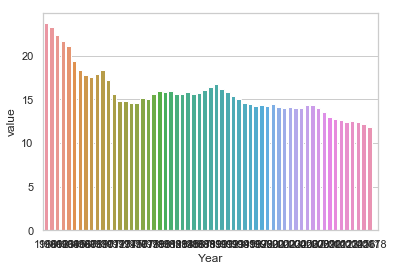

In [11]:
sns.set(style="whitegrid")
ax = sns.barplot(x='Year', y='value', data=stage)


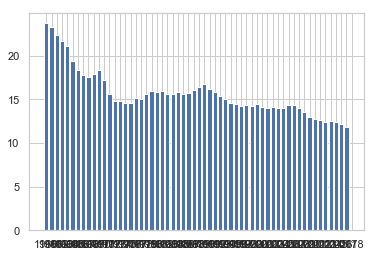

In [12]:
# get the years
years = stage['Year'].values
# get the values 
birthrate = stage['value'].values

# create
plt.bar(years,birthrate)
plt.show()

In [13]:
df_birthrate = df_long[df_long['Indicator Code'] == "SP.DYN.CBRT.IN"]
df_birthrate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
134,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.689955
1733,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,40.307514
3332,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,19.117434
4931,Early-demographic dividend,EAR,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,43.627366
6530,East Asia & Pacific,EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.279564


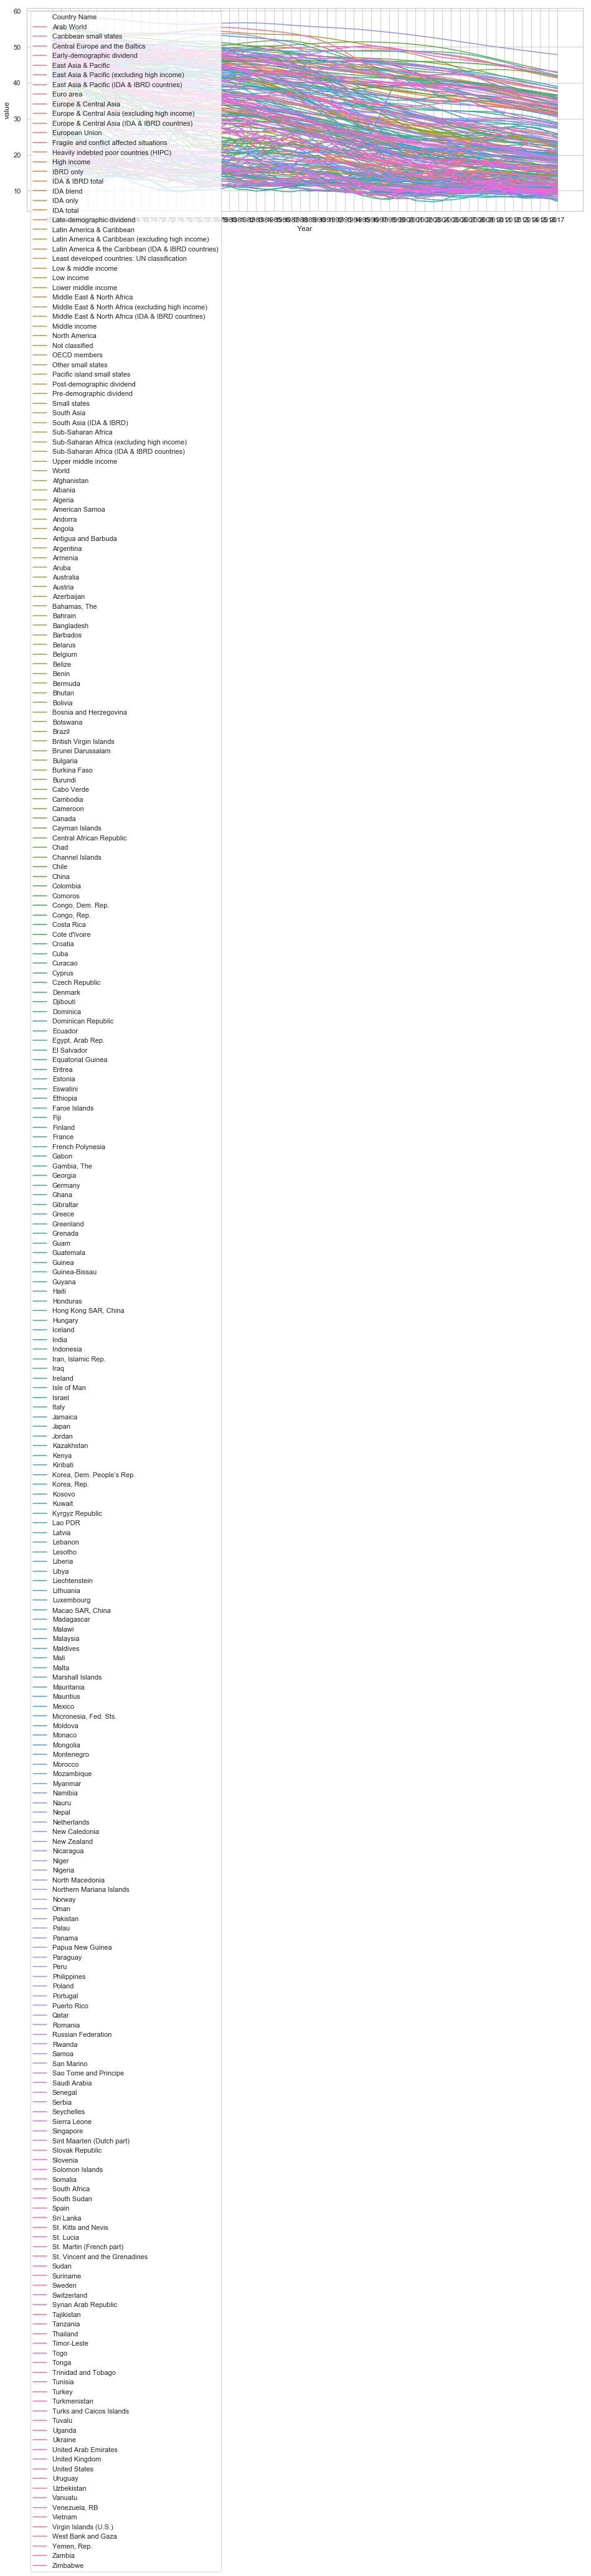

In [14]:

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="Year", y="value", data=df_birthrate, hue="Country Name")

## Indicators of Interest

- Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)	SG.DMK.SRCR.FN.ZS
- Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)	SG.DMK.ALLD.FN.ZS
- Women who believe a husband is justified in beating his wife (any of five reasons) (%)	SG.VAW.REAS.ZS
- Law prohibits or invalidates child or early marriage (1=yes; 0=no)	SG.LAW.CHMR
- Life expectancy at birth, female (years)	SP.DYN.LE00.FE.IN
- Legislation exists on domestic violence (1=yes; 0=no)	SG.LEG.DVAW
- Lifetime risk of maternal death (%)	SH.MMR.RISK.ZS
- Contributing family workers, female (% of female employment) (modeled ILO estimate)	SL.FAM.WORK.FE.ZS
- Children out of school (% of primary school age)	SE.PRM.UNER.ZS
- Children out of school, female (% of female primary school age)	SE.PRM.UNER.FE.ZS
- Adolescents out of school (% of lower secondary school age)	SE.SEC.UNER.LO.ZS
- Adolescents out of school, female (% of female lower secondary school age)	SE.SEC.UNER.LO.FE.ZS
- Wage and salaried workers, female (% of female employment) (modeled ILO estimate)	SL.EMP.WORK.FE.ZS
- Mortality rate, infant (per 1,000 live births)	SP.DYN.IMRT.IN
- Maternal mortality ratio (modeled estimate, per 100,000 live births)	SH.STA.MMRT

# Selected Features with few NaN Values

- population density, 
- % female laborers of total labor force, 
- under 5 mortality, 
- life expectancy at birth (years), 
- GDP per capita, 
- death rate, crude per 1000 people
- birth rate, crude per 1000 people
- renewable electricity output (% of total electricity output)
- population growth (annual %)
- primaray education duration (years)

# Preprocessing & Feature Engineering

In [35]:
features_recent.isna().sum()

EN.POP.DNST          332
SL.TLF.TOTL.FE.ZS    880
SH.DYN.MORT          935
SP.DYN.LE00.IN       759
NY.GDP.PCAP.CD       863
SP.DYN.CDRT.IN       641
SP.DYN.CBRT.IN       624
EG.ELC.RNEW.ZS       789
SP.POP.GROW          284
SE.PRM.DURS          364
dtype: int64

In [36]:
# calculate percentage of null values in each column
print(features_recent['EN.POP.DNST'].isna().sum() / features_recent.shape[0])
print(features_recent['SL.TLF.TOTL.FE.ZS'].isna().sum() / features_recent.shape[0])
print(features_recent['SH.DYN.MORT'].isna().sum() / features_recent.shape[0])
print(features_recent['SP.DYN.LE00.IN'].isna().sum() / features_recent.shape[0])
print(features_recent['NY.GDP.PCAP.CD'].isna().sum() / features_recent.shape[0])
print(features_recent['SP.DYN.CDRT.IN'].isna().sum() / features_recent.shape[0])
print(features_recent['SP.DYN.CBRT.IN'].isna().sum() / features_recent.shape[0])
print(features_recent['EG.ELC.RNEW.ZS'].isna().sum() / features_recent.shape[0])
print(features_recent['SP.POP.GROW'].isna().sum() / features_recent.shape[0])
print(features_recent['SE.PRM.DURS'].isna().sum() / features_recent.shape[0])

0.04352956601547135
0.11537957257112888
0.12259079585682443
0.09951488134259866
0.11315064901009571
0.08404352956601548
0.0818146060049823
0.10344827586206896
0.037236134784318864
0.04772518683623968


In [37]:
x = features_recent.dropna()
x.isna().sum()

EN.POP.DNST          0
SL.TLF.TOTL.FE.ZS    0
SH.DYN.MORT          0
SP.DYN.LE00.IN       0
NY.GDP.PCAP.CD       0
SP.DYN.CDRT.IN       0
SP.DYN.CBRT.IN       0
EG.ELC.RNEW.ZS       0
SP.POP.GROW          0
SE.PRM.DURS          0
dtype: int64

In [38]:
x.head()

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          2002    33.667131          32.529565        121.7   
                          2003    35.328939          32.601273        117.9   
                          2004    36.943570          32.704871        114.1   
                          2005    38.401492          32.853096        110.1   
                          2006    39.661566          32.740818        106.1   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.CD  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          56.637      184.494712   
                          2003          57.250      195.776630   
                          2004          57.875      216.708129   
                          2005          58.500      247.664140   
                          2006          59.110      269.229693   

                                SP.DYN.CDRT.IN  SP.DYN.CBRT.IN  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          11.167          47.252   
                          2003          10.748          46.556   
                          2004          10.325          45.778   
                          2005           9.906          44.910   
                          2006           9.498          43.937   

                                EG.ELC.RNEW.ZS  SP.POP.GROW  SE.PRM.DURS  
Country Name Country Code Year                                            
Afghanistan  AFG          2002       79.063971     4.720528          6.0  
                          2003       70.249729     4.818041          6.0  
                          2004       70.890841     4.468918          6.0  
                          2005       74.061810     3.870470          6.0  
                          2006       70.755750     3.228630          6.0

In [39]:
x['EN.POP.DNST'].values

array([33.66713078, 35.32893882, 36.94356983, ..., 38.91561587,
       39.83889104, 40.78441515])

In [40]:
#grab all rows, from first column to last column
X = x.iloc[:,0:].values

In [41]:
X

array([[ 33.66713078,  32.52956545, 121.7       , ...,  79.0639712 ,
          4.72052846,   6.        ],
       [ 35.32893882,  32.60127251, 117.9       , ...,  70.24972856,
          4.81804112,   6.        ],
       [ 36.94356983,  32.7048707 , 114.1       , ...,  70.89084065,
          4.4689184 ,   6.        ],
       ...,
       [ 38.91561587,  49.13662347,  66.8       , ...,  53.93939394,
          2.30936631,   7.        ],
       [ 39.83889104,  49.15450907,  61.1       , ...,  55.60542589,
          2.34479907,   7.        ],
       [ 40.78441515,  49.16962744,  57.        , ...,  52.72427644,
          2.34564297,   7.        ]])

In [42]:
X.shape

(5553, 10)

# DBSCAN & TSNE

## First Attempt - Default Parameters

In [43]:
from sklearn import cluster

In [44]:
eps = 0.2
dbscan = cluster.DBSCAN(eps=eps)

clustering_labels_1 = dbscan.fit_predict(X)

In [45]:
clustering_labels_1

array([-1, -1, -1, ..., -1, -1, -1])

In [46]:
#append labels to original df

x['labels'] = clustering_labels_1

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
x.head()

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          2002    33.667131          32.529565        121.7   
                          2003    35.328939          32.601273        117.9   
                          2004    36.943570          32.704871        114.1   
                          2005    38.401492          32.853096        110.1   
                          2006    39.661566          32.740818        106.1   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.CD  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          56.637      184.494712   
                          2003          57.250      195.776630   
                          2004          57.875      216.708129   
                          2005          58.500      247.664140   
                          2006          59.110      269.229693   

                                SP.DYN.CDRT.IN  SP.DYN.CBRT.IN  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          11.167          47.252   
                          2003          10.748          46.556   
                          2004          10.325          45.778   
                          2005           9.906          44.910   
                          2006           9.498          43.937   

                                EG.ELC.RNEW.ZS  SP.POP.GROW  SE.PRM.DURS  \
Country Name Country Code Year                                             
Afghanistan  AFG          2002       79.063971     4.720528          6.0   
                          2003       70.249729     4.818041          6.0   
                          2004       70.890841     4.468918          6.0   
                          2005       74.061810     3.870470          6.0   
                          2006       70.755750     3.228630          6.0   

                                labels  
Country Name Country Code Year          
Afghanistan  AFG          2002      -1  
                          2003      -1  
                          2004      -1  
                          2005      -1  
                          2006      -1

predicted the classes, in DBSCAN -1 is an outlier

In [67]:
np.unique(x['labels'].values)

array([-1])

Adjust hyperparameters

In [68]:
#first plot features with TSNE
#on the plot, color by labels from DBSCAN 
#create a function that takes in DBSCAN labels



Without TSNE plot

In [110]:
from itertools import cycle, islice
def plot_clustered_dataset(dataset, y_pred, xlim=None, ylim= None,
                           neighborhood=False, epsilon=0.5):
    '''
    Tool to help plot a clustered dataset with the epsilon hyperparameter
    '''
    
    fig, ax = plt.subplots()
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, 
                                 color='#666666', fill=False, 
                                 zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], 
               s=10, color=colors[y_pred], 
               zorder=10, edgecolor='black', lw=0.01)

    if xlim != None:
        plt.xlim(xlim)
    if ylim != None:
        plt.ylim(ylim)
        
    plt.show()

In [70]:
X[:,:2]

array([[33.66713078, 32.52956545],
       [35.32893882, 32.60127251],
       [36.94356983, 32.7048707 ],
       ...,
       [38.91561587, 49.13662347],
       [39.83889104, 49.15450907],
       [40.78441515, 49.16962744]])

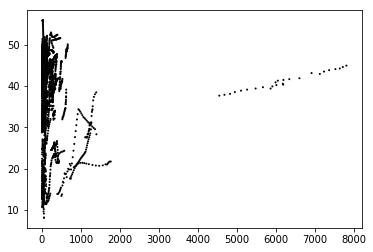

In [71]:
plot_clustered_dataset(X[:,:2], clustering_labels_1, xlim=None, ylim= None,
                           neighborhood=False, epsilon=0.2)

In [72]:
#slice of 2D
#find tsne components
#pass tsne 2D array where X[:,:2]


### TSNE

In [73]:
from sklearn.manifold import TSNE

#consider using PCA to reduce # of dimensions first (if more than 50)

#Should x be the labels?

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5553, 2)

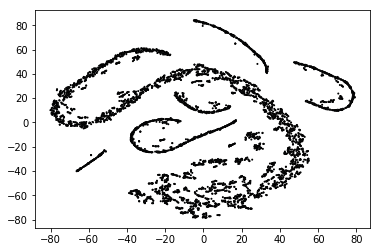

In [74]:
plot_clustered_dataset(X_embedded, clustering_labels_1, xlim=None, ylim= None,
                           neighborhood=False, epsilon=0.2)

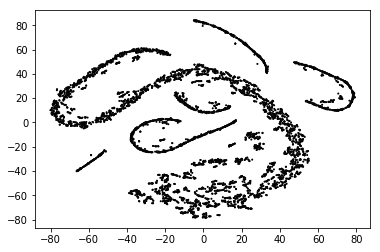

In [75]:
#what is neighborhood?
plot_clustered_dataset(X_embedded, clustering_labels_1, xlim=None, ylim= None,
                           neighborhood=True, epsilon=0.2)

## Tuning Hyperparameters - Epsilon = 0.5

In [76]:
#try a different epsilon value

eps = 0.5

dbscan = cluster.DBSCAN(eps=eps)
clustering_labels_2 = dbscan.fit_predict(X)



In [77]:
clustering_labels_2

array([-1, -1, -1, ..., -1, -1, -1])

In [78]:
#append labels to original df

x['labels'] = clustering_labels_2

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
x.head()

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          2002    33.667131          32.529565        121.7   
                          2003    35.328939          32.601273        117.9   
                          2004    36.943570          32.704871        114.1   
                          2005    38.401492          32.853096        110.1   
                          2006    39.661566          32.740818        106.1   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.CD  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          56.637      184.494712   
                          2003          57.250      195.776630   
                          2004          57.875      216.708129   
                          2005          58.500      247.664140   
                          2006          59.110      269.229693   

                                SP.DYN.CDRT.IN  SP.DYN.CBRT.IN  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          11.167          47.252   
                          2003          10.748          46.556   
                          2004          10.325          45.778   
                          2005           9.906          44.910   
                          2006           9.498          43.937   

                                EG.ELC.RNEW.ZS  SP.POP.GROW  SE.PRM.DURS  \
Country Name Country Code Year                                             
Afghanistan  AFG          2002       79.063971     4.720528          6.0   
                          2003       70.249729     4.818041          6.0   
                          2004       70.890841     4.468918          6.0   
                          2005       74.061810     3.870470          6.0   
                          2006       70.755750     3.228630          6.0   

                                labels  
Country Name Country Code Year          
Afghanistan  AFG          2002      -1  
                          2003      -1  
                          2004      -1  
                          2005      -1  
                          2006      -1

predicted the classes, in DBSCAN -1 is an outlier

In [80]:
np.unique(x['labels'].values)

array([-1])

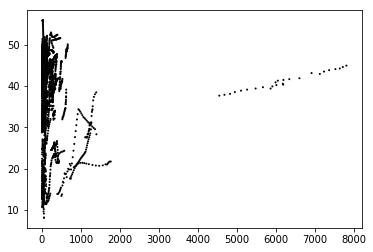

In [81]:
plot_clustered_dataset(X[:,:2], clustering_labels_2, xlim=None, ylim= None,
                           neighborhood=False, epsilon=0.5)

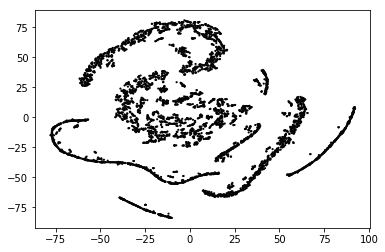

In [82]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

In [ ]:
plot_clustered_dataset(X_embedded, clustering_labels_2, xlim=None, ylim= None,
                           neighborhood=True, epsilon=0.5)

## Tuning Hyperparameters - Epsilon = 1

In [83]:
#try a different epsilon value

eps = 1

dbscan = cluster.DBSCAN(eps=eps)
clustering_labels_3 = dbscan.fit_predict(X)



In [84]:
clustering_labels_3

array([-1, -1, -1, ..., -1, -1, -1])

In [85]:
#append labels to original df

x['labels'] = clustering_labels_3

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
x.head()

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          2002    33.667131          32.529565        121.7   
                          2003    35.328939          32.601273        117.9   
                          2004    36.943570          32.704871        114.1   
                          2005    38.401492          32.853096        110.1   
                          2006    39.661566          32.740818        106.1   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.CD  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          56.637      184.494712   
                          2003          57.250      195.776630   
                          2004          57.875      216.708129   
                          2005          58.500      247.664140   
                          2006          59.110      269.229693   

                                SP.DYN.CDRT.IN  SP.DYN.CBRT.IN  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          11.167          47.252   
                          2003          10.748          46.556   
                          2004          10.325          45.778   
                          2005           9.906          44.910   
                          2006           9.498          43.937   

                                EG.ELC.RNEW.ZS  SP.POP.GROW  SE.PRM.DURS  \
Country Name Country Code Year                                             
Afghanistan  AFG          2002       79.063971     4.720528          6.0   
                          2003       70.249729     4.818041          6.0   
                          2004       70.890841     4.468918          6.0   
                          2005       74.061810     3.870470          6.0   
                          2006       70.755750     3.228630          6.0   

                                labels  
Country Name Country Code Year          
Afghanistan  AFG          2002      -1  
                          2003      -1  
                          2004      -1  
                          2005      -1  
                          2006      -1

predicted the classes, in DBSCAN -1 is an outlier

In [87]:
np.unique(x['labels'].values)

array([-1])

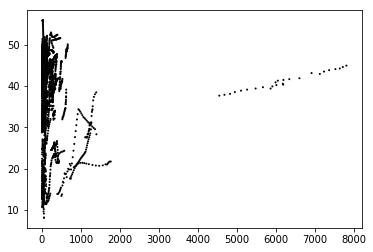

In [88]:
plot_clustered_dataset(X[:,:2], clustering_labels_3, xlim=None, ylim= None,
                           neighborhood=False, epsilon=1)

In [89]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5553, 2)

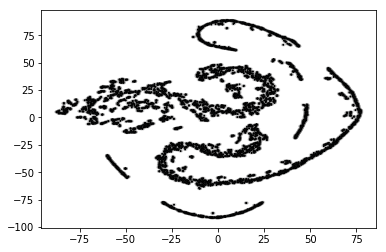

In [90]:
plot_clustered_dataset(X_embedded, clustering_labels_3, xlim=None, ylim= None,
                           neighborhood=True, epsilon=1)

## Tuning Hyperparameters - Epsilon = 2

In [91]:
#try a different epsilon value

eps = 2

dbscan = cluster.DBSCAN(eps=eps)
clustering_labels_4 = dbscan.fit_predict(X)



In [93]:
#append labels to original df

x['labels'] = clustering_labels_4

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


predicted the classes, in DBSCAN -1 is an outlier

In [95]:
np.unique(x['labels'].values)

array([-1])

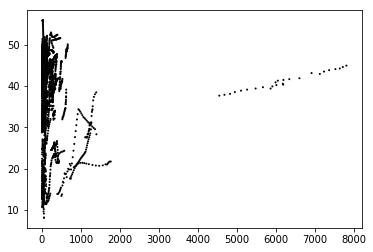

In [96]:
plot_clustered_dataset(X[:,:2], clustering_labels_4, xlim=None, ylim= None,
                           neighborhood=False, epsilon=2)

In [97]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5553, 2)

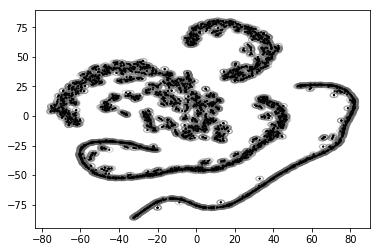

In [98]:
plot_clustered_dataset(X_embedded, clustering_labels_4, xlim=None, ylim= None,
                           neighborhood=True, epsilon=2)

In [ ]:
#keep increasing epsilon?
#how do we interpret the clusters?
#other models I should run?

In [ ]:
#grid search next step
#try a range of epsilon values
#grid search from sklearn (not victor's example)

In [ ]:
#eps_values = [0.3, 0.5, 1, 1.3, 1.5]
#min_samples_values = [2, 5, 10, 20, 80]

#plot_dbscan_grid(data, eps_values, min_samples_values)

In [99]:
#try a different epsilon value

eps = 10

dbscan = cluster.DBSCAN(eps=eps)
clustering_labels_5 = dbscan.fit_predict(X)



In [100]:
#append labels to original df

x['labels'] = clustering_labels_5

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


predicted the classes, in DBSCAN -1 is an outlier

In [101]:
np.unique(x['labels'].values)

array([-1,  0,  1,  2,  3,  4,  5])

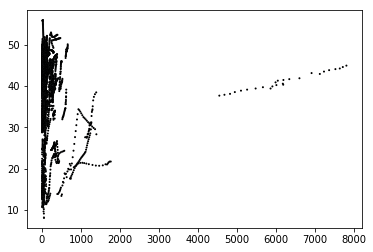

In [102]:
plot_clustered_dataset(X[:,:2], clustering_labels_5, xlim=None, ylim= None,
                           neighborhood=False, epsilon=10)

In [103]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5553, 2)

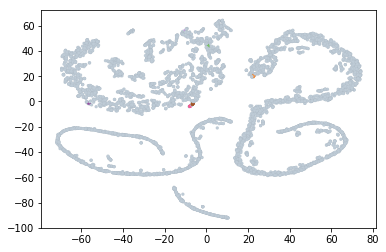

In [111]:
plot_clustered_dataset(X_embedded, clustering_labels_5, xlim=None, ylim= None,
                           neighborhood=False, epsilon=10)

In [112]:
#epsilon is still too small

In [113]:
#try a different epsilon value

eps = 100

dbscan = cluster.DBSCAN(eps=eps)
clustering_labels_6 = dbscan.fit_predict(X)



In [114]:
#append labels to original df

x['labels'] = clustering_labels_6

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


predicted the classes, in DBSCAN -1 is an outlier

In [115]:
np.unique(x['labels'].values)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

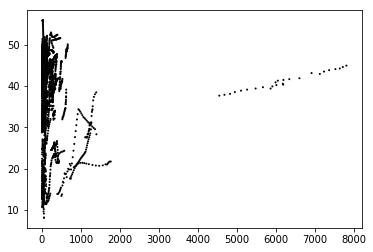

In [96]:
plot_clustered_dataset(X[:,:2], clustering_labels_6, xlim=None, ylim= None,
                           neighborhood=False, epsilon=100)

In [116]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5553, 2)

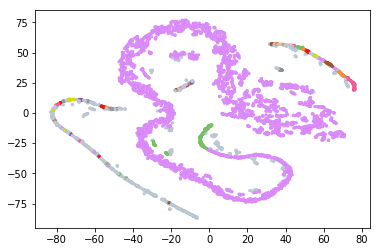

In [117]:
plot_clustered_dataset(X_embedded, clustering_labels_6, xlim=None, ylim= None,
                           neighborhood=False, epsilon=100)

#x_embedded = an array of arrays of x/y components
#[ [40,5], [10,3]....]
#color based on clustering labels (what group they belong to)
#next, need list of identifying info
#transform so that we have a single column of country-year
#make a df = country-year, x component of tsne, y component of tsne, label
#color=label
#X[:,0]

#pd.df

In [ ]:
#adjust min sample size
#min sample too small, it will make too many groups
#maybe still make epsilon bigger, 1000

In [119]:
df = pd.DataFrame(data=clustering_labels_6)

In [120]:
X_embedded

array([[60.03972  , -1.4784883],
       [59.76024  , -1.9076893],
       [59.065002 , -2.723865 ],
       ...,
       [-8.662197 , 72.372116 ],
       [-8.574903 , 72.38561  ],
       [-8.545729 , 72.314    ]], dtype=float32)

In [121]:
X_embedded[:,0]

array([60.03972 , 59.76024 , 59.065002, ..., -8.662197, -8.574903,
       -8.545729], dtype=float32)

In [122]:
df["x_component"]=X_embedded[:,0]

In [123]:
df.head()

,0,x_component
0,0,60.039719
1,0,59.760239
2,0,59.065002
3,0,56.676003
4,0,55.813637


In [124]:
x

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          2002    33.667131          32.529565        121.7   
                          2003    35.328939          32.601273        117.9   
                          2004    36.943570          32.704871        114.1   
                          2005    38.401492          32.853096        110.1   
                          2006    39.661566          32.740818        106.1   
                          2007    40.769525          32.668997        102.0   
                          2008    41.806867          32.647428         97.9   
                          2009    42.894849          32.687804         93.9   
                          2010    44.118443          32.794306         90.0   
                          2011    45.505314          33.086753         86.2   
                          2012    47.019205          33.451564         82.6   
                          2013    48.604123          33.865769         79.2   
                          2014    50.176179          34.301982         76.0   
                          2015    51.674929          34.743507         73.1   
Albania      ALB          1990   119.946788          40.873615         40.1   
                          1991   119.225912          42.222871         38.4   
                          1992   118.505073          42.997574         36.8   
                          1993   117.784197          43.361682         35.4   
                          1994   117.063358          43.715303         33.9   
                          1995   116.342482          43.810771         32.4   
                          1996   115.621642          43.317856         30.9   
                          1997   114.900766          43.069058         29.3   
                          1998   114.179927          42.305661         27.7   
                          1999   113.459051          41.552125         26.1   
                          2000   112.738212          41.090723         24.5   
                          2001   111.685146          40.946072         22.9   
                          2002   111.350730          40.995849         21.4   
                          2003   110.934891          41.248591         19.9   
                          2004   110.472226          41.534477         18.5   
                          2005   109.908285          41.801278         17.2   
...                                     ...                ...          ...   
Zambia       ZMB          2012    19.774193          47.497406         74.9   
                          2013    20.383930          47.573697         71.6   
                          2014    21.013161          47.659307         68.0   
                          2015    21.658331          47.751464         64.9   
Zimbabwe     ZWE          1990    26.323156          45.401581         77.5   
                          1991    26.995070          45.569506         80.7   
                          1992    27.615014          45.721821         84.8   
                          1993    28.191175          45.923230         89.3   
                          1994    28.737102          46.159108         93.8   
                          1995    29.262882          46.376067         98.0   
                          1996    29.774491          46.563699        101.0   
                          1997    30.270123          46.734952        102.7   
                          1998    30.743885          46.553910        103.2   
                          1999    31.186602          46.391322        102.6   
                          2000    31.594290          46.878337        101.8   
                          2001    31.966305          47.372662        100.8   
                          2002    32.313623          47.854688        100.1   
                          2003    32.658387          48.317757         99.4   
   

In [126]:
#county-year

x.columns

Index(['EN.POP.DNST', 'SL.TLF.TOTL.FE.ZS', 'SH.DYN.MORT', 'SP.DYN.LE00.IN',
       'NY.GDP.PCAP.CD', 'SP.DYN.CDRT.IN', 'SP.DYN.CBRT.IN', 'EG.ELC.RNEW.ZS',
       'SP.POP.GROW', 'SE.PRM.DURS', 'labels'],
      dtype='object')

In [127]:
#unstack so that year and county are columns
x["x_component"]=X_embedded[:,0]
x["y_component"]=X_embedded[:,1]

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
x.head()

EN.POP.DNST  SL.TLF.TOTL.FE.ZS  SH.DYN.MORT  \
Country Name Country Code Year                                                
Afghanistan  AFG          2002    33.667131          32.529565        121.7   
                          2003    35.328939          32.601273        117.9   
                          2004    36.943570          32.704871        114.1   
                          2005    38.401492          32.853096        110.1   
                          2006    39.661566          32.740818        106.1   

                                SP.DYN.LE00.IN  NY.GDP.PCAP.CD  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          56.637      184.494712   
                          2003          57.250      195.776630   
                          2004          57.875      216.708129   
                          2005          58.500      247.664140   
                          2006          59.110      269.229693   

                                SP.DYN.CDRT.IN  SP.DYN.CBRT.IN  \
Country Name Country Code Year                                   
Afghanistan  AFG          2002          11.167          47.252   
                          2003          10.748          46.556   
                          2004          10.325          45.778   
                          2005           9.906          44.910   
                          2006           9.498          43.937   

                                EG.ELC.RNEW.ZS  SP.POP.GROW  SE.PRM.DURS  \
Country Name Country Code Year                                             
Afghanistan  AFG          2002       79.063971     4.720528          6.0   
                          2003       70.249729     4.818041          6.0   
                          2004       70.890841     4.468918          6.0   
                          2005       74.061810     3.870470          6.0   
                          2006       70.755750     3.228630          6.0   

                                labels  x_component  
Country Name Country Code Year                       
Afghanistan  AFG          2002       0    60.039719  
                          2003       0    59.760239  
                          2004       0    59.065002  
                          2005       0    56.676003  
                          2006       0    55.813637

In [91]:
#try a different epsilon value

eps = 2

dbscan = cluster.DBSCAN(eps=eps, min_sample = 50)
clustering_labels_4 = dbscan.fit_predict(X)



In [93]:
#append labels to original df

x['labels'] = clustering_labels_4

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


predicted the classes, in DBSCAN -1 is an outlier

In [95]:
np.unique(x['labels'].values)

array([-1])

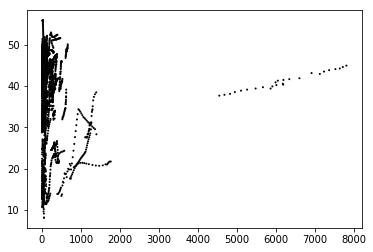

In [96]:
plot_clustered_dataset(X[:,:2], clustering_labels_4, xlim=None, ylim= None,
                           neighborhood=False, epsilon=2)

In [97]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5553, 2)

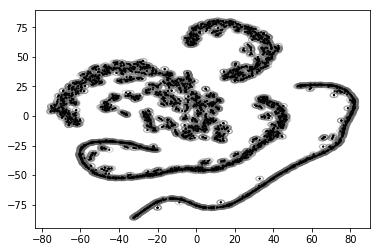

In [98]:
plot_clustered_dataset(X_embedded, clustering_labels_4, xlim=None, ylim= None,
                           neighborhood=True, epsilon=2)

# K Means Model

## Implement K-means Clustering in scikit-learn

In [11]:
#starter code from curriculum

In [ ]:
from sklearn.cluster import KMeans

# Set number of clusters at initialization time
k_means = KMeans(n_clusters=3) 

# Run the clustering algorithm
k_means.fit(some_df) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(some_df) 

# Cluster predictions for each point are also stored in k_means.labels_

In [ ]:
k_means = KMeans(n_clusters = 7) #create a k means object and set n_clusters to the number you want to start with
k_means.fit(X) #fit the k means object to the data stored in X
y_hat = k_means.predict(X) # generate cluster predictions with k_means and store the results in y_hat

In [ ]:
#visualize the k-means clusters
plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

## Evaluating Cluster Fitness

### Calinski Harabasz Score (AKA Variance Ratio)

The variance ratio is a ratio of the variance of the points within a cluster, to the variance of a point to points in other clusters. We want intra-cluster variance to be low (suggesting that the clusters are tightly knit), and inter-cluster variance to be high (suggesting that there is little to no ambiguity about which cluster the points belong to). So, higher CH score means the model has better defined clusters.

When you have k clusters, the score s is a ratio of the between-cluster dispersion, and the within-cluster dispersion.

$$ s(k) = \dfrac{Tr(B_k)}{Tr(W_k)}\times \dfrac{N-k}{k-1}$$

Here, the between group dispersion matrix is $B_k$ and the withing dispersion matrix is $W_k$:

$$W_k = \sum^k_{q=1} \sum_{x\in C_q} (x - c_q)(x-c_q)^T$$ $$B_k = \sum_{q} n_q (c_q - c)(c_q-c)^T$$

where

- $N$ is the data size
- $C_q$ represents the samples in cluster $q$
- $c_q$ represents the center of cluster $q$
- $c$ the center of $E$
- $n_q$ the number of samples in cluster $q$.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Note that we could also pass in k_means.labels_ instead of cluster_assignments
print(calinski_harabasz_score(some_df, cluster_assignments))

In [ ]:
#lab example

metrics.calinski_harabaz_score(X, labels)

### Silhouette Score is another metric used to evaluate cluster fit

If the actual cluster labels are unknown, the model itself must be used for evaluation. When calculating the Silhouette Coefficient, a higher score means that you ended up with a model with better defined clusters. Two scores are used to generate the silhouette coefficient:

- a is the average distance between one data sample and all other points in the same cluster
- b The average distance between one data sample and all other points in the next nearest cluster.

$$ s = \dfrac{(b-a)}{max(b-a)} $$



In [ ]:
from sklearn import metrics
labels = k_means.labels_ #store the labels_ from the model in the labels variable

metrics.silhouette_score(X, labels, metric='euclidean') #call the silhouette_score() 
#function from the metrics module. Pass in teh data X, labels, and set the metric parameter equal to euclidean

# Hierarchical Agglomerative Clustering - don't have to have # of clusters pre-determined

# K Nearest Neighbors Model (maybe after unsupervised models)

## Create training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state=42)

## Normalize the data

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=df.columns)
scaled_df_train.head()

## Fit a KNN model

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

## Evaluate the Model

In [ ]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

## Improve model performance

# Practice/Unused Code

In [42]:
df['Indicator_Code'].nunique()


1599

In [8]:
df_electricity_grouped = df_electricity.groupby('Country Code')
df_electricity_grouped.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
3201,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4800,Early-demographic dividend,EAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
6399,East Asia & Pacific,EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
7998,East Asia & Pacific (excluding high income),EAP,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
9597,East Asia & Pacific (IDA & IBRD countries),TEA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
11196,Euro area,EMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
12795,Europe & Central Asia,ECS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
14394,Europe & Central Asia (excluding high income),ECA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN


In [6]:
ChinaIndia_subset = df.query('Country_Name == "China" or Country_Name == "India"')
Electricity_subset = ChinaIndia_subset.query('Indicator_Code == "EG.ELC.ACCS.ZS"')
Electricity_subset.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
140715,China,CHN,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.115646,99.7,99.748726,99.916382,99.983116,99.998489,100.0,100.000000,NaN,NaN
217467,India,IND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000000,76.3,67.600000,79.900000,79.599113,81.239510,88.0,84.526817,NaN,NaN


In [7]:
Electricity_subset2 = Electricity_subset.drop(Electricity_subset.columns[[0,1,2,3]], axis=1).transpose()
Electricity_subset2.columns = ["China", "India"]
Electricity_subset2

,China,India
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
1965,NaN,NaN
1966,NaN,NaN
1967,NaN,NaN
1968,NaN,NaN
1969,NaN,NaN


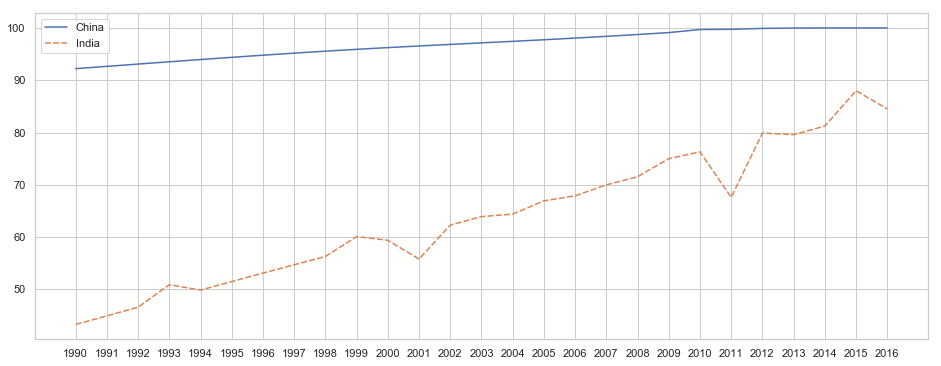

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=Electricity_subset2)

In [34]:
Electricity = df.query('Indicator_Code == "EG.ELC.ACCS.ZS"')
Electricity.head(2)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.368681,93.114511,92.677095,93.625323,94.672223,95.557923,95.568684,96.016309,NaN,NaN


In [35]:
Electricity.set_index('Country_Name')
Electricity.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.368681,93.114511,92.677095,93.625323,94.672223,95.557923,95.568684,96.016309,NaN,NaN
3201,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4800,Early-demographic dividend,EAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,78.682380,79.455104,76.450537,82.264495,82.585641,83.534424,86.972615,86.751627,NaN,NaN
6399,East Asia & Pacific,EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.988562,95.496184,95.818281,96.226282,96.446001,96.589744,96.872611,96.914214,NaN,NaN


In [36]:
Electricity = Electricity.drop(Electricity.columns[[1,2,3]], axis=1).transpose()
Electricity.head()

,3,1602,3201,4800,6399,7998,9597,11196,12795,14394,...,406149,407748,409347,410946,412545,414144,415743,417342,418941,420540
Country_Name,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
new_header = Electricity.iloc[0] #grab the first row for the header
Electricity = Electricity[1:] #take the data less the header row
Electricity.columns = new_header #set the header row as the df header

Electricity.head()

Country_Name,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
Electricity.columns = [column.replace(" ", "_") for column in Electricity.columns]

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=Electricity)

ValueError: These `style` levels are missing dashes: {'Uzbekistan', 'Vanuatu', 'South_Africa', 'Liberia', 'Chile', 'El_Salvador', 'Lao_PDR', 'Israel', 'Europe_&_Central_Asia', 'IDA_only', 'Djibouti', 'Egypt,_Arab_Rep.', 'Eritrea', 'Tonga', 'Romania', 'Pakistan', 'Algeria', 'Europe_&_Central_Asia_(IDA_&_IBRD_countries)', 'South_Asia_(IDA_&_IBRD)', 'Eswatini', 'Monaco', 'Late-demographic_dividend', 'Venezuela,_RB', 'Cameroon', 'Haiti', 'United_States', 'Latin_America_&_Caribbean_(excluding_high_income)', 'Nigeria', 'Antigua_and_Barbuda', 'Middle_East_&_North_Africa_(IDA_&_IBRD_countries)', 'Singapore', 'British_Virgin_Islands', 'Guyana', 'Sao_Tome_and_Principe', 'Sierra_Leone', 'St._Martin_(French_part)', 'Bhutan', 'Guatemala', 'Mali', 'Nepal', 'Cayman_Islands', 'Latin_America_&_the_Caribbean_(IDA_&_IBRD_countries)', 'Mauritius', 'Samoa', 'Estonia', 'Lithuania', 'Tajikistan', 'Gibraltar', 'Sudan', 'Post-demographic_dividend', 'San_Marino', 'New_Caledonia', 'Poland', 'Sub-Saharan_Africa', 'Syrian_Arab_Republic', 'Spain', 'Slovak_Republic', 'Channel_Islands', 'Bangladesh', 'Saudi_Arabia', 'Malta', 'Qatar', 'Austria', 'Switzerland', 'Canada', 'Cambodia', 'Trinidad_and_Tobago', 'Morocco', 'Denmark', 'Colombia', 'Albania', 'China', 'Luxembourg', 'South_Sudan', 'Isle_of_Man', 'Small_states', 'Japan', 'Hong_Kong_SAR,_China', 'Fiji', 'Zimbabwe', 'Heavily_indebted_poor_countries_(HIPC)', 'Guinea', 'Palau', 'Belgium', 'Costa_Rica', 'Latvia', 'Lebanon', 'Greenland', 'Slovenia', 'North_America', 'Norway', 'Cabo_Verde', 'Belarus', 'Not_classified', 'Cyprus', 'Sint_Maarten_(Dutch_part)', 'Jordan', 'Honduras', 'Mauritania', 'Pacific_island_small_states', "Cote_d'Ivoire", 'Least_developed_countries:_UN_classification', 'Marshall_Islands', 'St._Lucia', 'Malaysia', 'Sri_Lanka', 'Finland', 'Bulgaria', 'Jamaica', 'American_Samoa', 'Seychelles', 'Guam', 'Kazakhstan', 'Oman', 'Iran,_Islamic_Rep.', 'Sweden', 'Tunisia', 'Korea,_Rep.', 'Uganda', 'Czech_Republic', 'Senegal', 'Tanzania', 'St._Vincent_and_the_Grenadines', 'Bolivia', 'Hungary', 'Mozambique', 'Ecuador', 'Andorra', 'Liechtenstein', 'Fragile_and_conflict_affected_situations', 'St._Kitts_and_Nevis', 'Sub-Saharan_Africa_(IDA_&_IBRD_countries)', 'Pre-demographic_dividend', 'Northern_Mariana_Islands', 'IDA_total', 'Middle_income', 'Montenegro', 'IBRD_only', 'Bahamas,_The', 'Guinea-Bissau', 'IDA_&_IBRD_total', 'Malawi', 'Greece', 'Kenya', 'India', 'Aruba', 'Maldives', 'Euro_area', 'French_Polynesia', 'East_Asia_&_Pacific_(IDA_&_IBRD_countries)', 'Lesotho', 'Chad', 'Kiribati', 'Timor-Leste', 'Angola', 'Bahrain', 'Central_African_Republic', 'Azerbaijan', 'Serbia', 'Ghana', 'Croatia', 'Vietnam', 'Yemen,_Rep.', 'Kosovo', 'Rwanda', 'United_Arab_Emirates', 'Europe_&_Central_Asia_(excluding_high_income)', 'Libya', 'Netherlands', 'North_Macedonia', 'United_Kingdom', 'Botswana', 'Dominica', 'Italy', 'Russian_Federation', 'Turks_and_Caicos_Islands', 'Virgin_Islands_(U.S.)', 'Namibia', 'Somalia', 'Mongolia', 'Bermuda', 'Ireland', 'Dominican_Republic', 'Iceland', 'High_income', 'Argentina', 'Panama', 'Middle_East_&_North_Africa', 'Portugal', 'Mexico', 'Comoros', 'France', 'Gabon', 'Ethiopia', 'Afghanistan', 'Papua_New_Guinea', 'Indonesia', 'Macao_SAR,_China', 'Micronesia,_Fed._Sts.', 'Kyrgyz_Republic', 'Uruguay', 'Middle_East_&_North_Africa_(excluding_high_income)', 'Armenia', 'Solomon_Islands', 'Brunei_Darussalam', 'Iraq', 'Burundi', 'Moldova', 'Faroe_Islands', 'Sub-Saharan_Africa_(excluding_high_income)', 'Australia', 'Congo,_Dem._Rep.', 'Upper_middle_income', 'Myanmar', 'Philippines', 'Equatorial_Guinea', 'Barbados', 'Kuwait', 'Belize', 'Low_income', 'Paraguay', 'Brazil', 'West_Bank_and_Gaza', 'Bosnia_and_Herzegovina', 'Germany', 'Togo', 'South_Asia', 'Nicaragua', 'Thailand', 'Nauru', 'Other_small_states', 'Turkmenistan', 'Georgia', 'Tuvalu', 'New_Zealand', 'Niger', 'Zambia', 'Ukraine', 'Puerto_Rico', 'Gambia,_The', 'IDA_blend', 'Congo,_Rep.', 'Lower_middle_income', 'World', 'Turkey', 'European_Union', 'Low_&_middle_income', 'OECD_members', 'Korea,_Dem._People’s_Rep.', 'Grenada', 'Madagascar', 'Cuba', 'Suriname', 'Burkina_Faso', 'Benin', 'Curacao', 'Latin_America_&_Caribbean', 'Peru'}

<Figure size 1152x432 with 0 Axes>

In [8]:
df.columns = [column.replace(" ", "_") for column in df.columns]